In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot
import gdal
import geopandas
import pandas as pd
import numpy as np
import copy
import ogr, os
import shapely
from shapely.geometry import MultiPolygon, Point

In [2]:
def poly2line(input_poly,output_line):

    source_ds = ogr.Open(input_poly)
    source_layer = source_ds.GetLayer()

    # polygon2geometryCollection
    geomcol =  ogr.Geometry(ogr.wkbGeometryCollection)
    for feat in source_layer:
        geom = feat.GetGeometryRef()
        ring = geom.GetGeometryRef(0)
        geomcol.AddGeometry(ring)

    # geometryCollection2shp
    shpDriver = ogr.GetDriverByName("ESRI Shapefile")
    if os.path.exists(output_line):
            shpDriver.DeleteDataSource(output_line)
    outDataSource = shpDriver.CreateDataSource(output_line)
    outLayer = outDataSource.CreateLayer(output_line, geom_type=ogr.wkbMultiLineString)
    featureDefn = outLayer.GetLayerDefn()
    outFeature = ogr.Feature(featureDefn)
    outFeature.SetGeometry(geomcol)
    outLayer.CreateFeature(outFeature)
    outFeature = None

In [3]:
def main(input_poly,output_line):
    poly2line(input_poly,output_line)


In [4]:
if __name__ == "__main__":
    input_poly = 'Polygons/buildingstest.shp'
    output_line = 'Points/trees.shp'

    main(input_poly,output_line)

In [5]:
expol = geopandas.read_file("Points/trees.shp")

In [6]:
expol

,FID,geometry
0,0,"(LINESTRING (174.784621 -41.2929667, 174.78451..."


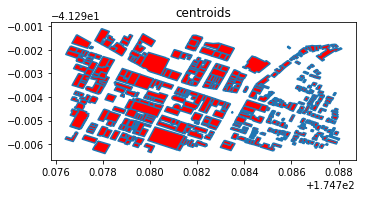

In [7]:
fig = pyplot.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title("linestring")
expol.plot(ax=ax1, facecolor='Red')

In [8]:
expol.type

0    MultiLineString
dtype: object

In [10]:
import string

In [11]:
string.split(expol, '\n') 

AttributeError: module 'string' has no attribute 'split'